In [4]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#XArray - http://xarray.pydata.org/en/stable/index.html
# - Multi dimensional computation
# - Slicing by any of the dimension
# - Built-in mathematical computation with NumPy package
# - Compatible with most Pandas functions

In [6]:
#What to expect from today's workshop
# - Use xarray to select dataset
# - 1-D and 2-D plotting / contour plotting with xarray and CartoPy
# - Simple time series analysis with Pandas

In [7]:
#For these examples we’ll use the North American air temperature dataset.
airtemps = xr.tutorial.load_dataset('air_temperature')
#Convert the temperature to celcius
air = airtemps.air - 273.15

airtemps
air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-31.95, -30.65, ..., -37.65, -34.55],
        [-29.35, -28.65, ..., -37.85, -33.85],
        ..., 
        [ 22.75,  23.05, ...,  22.75,  22.05],
        [ 23.14,  23.64, ...,  23.64,  23.45]],

       [[-31.05, -30.45, ..., -39.55, -37.35],
        [-29.55, -29.05, ..., -40.65, -37.45],
        ..., 
        [ 23.05,  23.55, ...,  22.35,  21.95],
        [ 23.14,  24.05, ...,  23.25,  23.45]],

       ..., 
       [[-27.36, -28.36, ..., -29.16, -28.36],
        [-23.26, -23.86, ..., -30.66, -28.86],
        ..., 
        [ 23.14,  24.04, ...,  21.94,  21.24],
        [ 24.64,  25.24, ...,  22.34,  22.04]],

       [[-28.06, -28.86, ..., -31.66, -31.36],
        [-23.26, -23.86, ..., -32.86, -31.46],
        ..., 
        [ 22.94,  23.74, ...,  22.54,  22.04],
        [ 24.54,  24.94, ...,  23.04,  22.54]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) fl

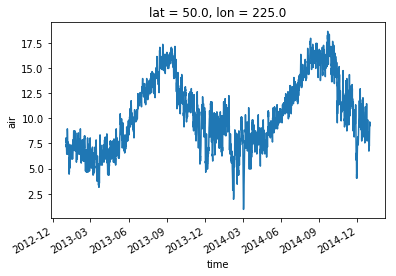

In [8]:
#Select the data from 1 grid point
air1d = air.isel(lat=10, lon=10)
air1d.plot()
plt.show()

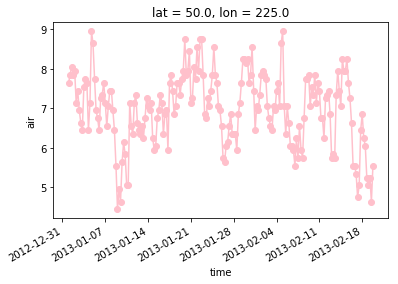

In [9]:
#Play with the plot
air1d[:200].plot.line(color='pink', marker='o')
plt.show()

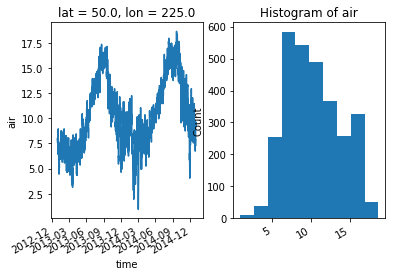

In [10]:
#Add another plot - horizontal
fig, axes = plt.subplots(ncols=2)
air1d.plot(ax=axes[0])
air1d.plot.hist(ax=axes[1])
plt.show()

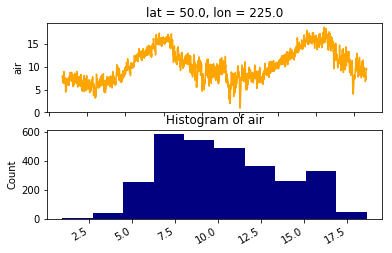

In [21]:
#Add another plot - vertical
fig, axes = plt.subplots(nrows=2)
air1d.plot(ax=axes[0],color='orange')
air1d.plot.hist(ax=axes[1],color='navy')
plt.show()

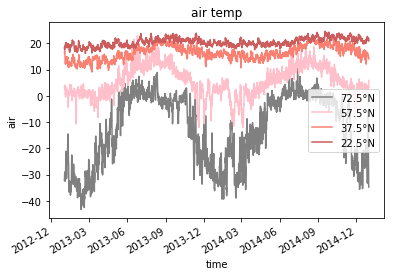

In [106]:
#Overplot - multiple plots in one figure
#A horizontal look at the temperature profile along one longitude
p1 = air.isel(lon=10, lat=1).plot(color='grey')
p2 = air.isel(lon=10, lat=7).plot(color='pink')
p3 = air.isel(lon=10, lat=15).plot(color='salmon')
p4 = air.isel(lon=10, lat=21).plot(color='indianred')
coords = [str(air['lat'][1].values)+'°N',str(air['lat'][7].values)+'°N',
          str(air['lat'][15].values)+'°N',str(air['lat'][21].values)+'°N']
plt.title('air temp')
plt.legend(coords,loc=7)
plt.show()

In [88]:
#let's take a look at the data we plotted
air.isel(lon=10, lat=1).shape

(2920,)

In [102]:
#Indexing the data
#air['lat'][1]
air['lon'][10]

<xarray.DataArray 'lon' ()>
array(225.0, dtype=float32)
Coordinates:
    lon      float32 225.0
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

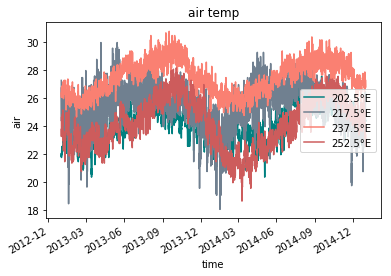

In [114]:
#Practice - plot the temporal variations
p1 = air.isel(lat=24, lon=12).plot(color='teal')
p2 = air.isel(lat=24, lon=25).plot(color='slategray')
p3 = air.isel(lat=24, lon=37).plot(color='salmon')
p4 = air.isel(lat=24, lon=50).plot(color='indianred')
coords = [str(air['lon'][1].values)+'°E',str(air['lon'][7].values)+'°E',
          str(air['lon'][15].values)+'°E',str(air['lon'][21].values)+'°E']
plt.title('air temp')
plt.legend(coords,loc=7)
plt.show()

In [115]:
# https://www.webucator.com/blog/2015/03/python-color-constants-module/
air['lon']


<xarray.DataArray 'lon' (lon: 53)>
array([ 200. ,  202.5,  205. ,  207.5,  210. ,  212.5,  215. ,  217.5,  220. ,
        222.5,  225. ,  227.5,  230. ,  232.5,  235. ,  237.5,  240. ,  242.5,
        245. ,  247.5,  250. ,  252.5,  255. ,  257.5,  260. ,  262.5,  265. ,
        267.5,  270. ,  272.5,  275. ,  277.5,  280. ,  282.5,  285. ,  287.5,
        290. ,  292.5,  295. ,  297.5,  300. ,  302.5,  305. ,  307.5,  310. ,
        312.5,  315. ,  317.5,  320. ,  322.5,  325. ,  327.5,  330. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 210.0 212.5 215.0 217.5 ...
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

/N/u/xuecliu/Karst/anaconda3/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


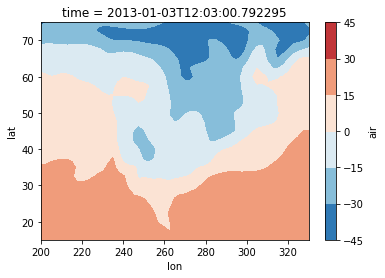

In [11]:
#What about a whole map
#2-dimensional
air2d = air.isel(time=10)
air2d.plot.contourf()
plt.show()

In [12]:
#Use another projection
import cartopy.crs as ccrs

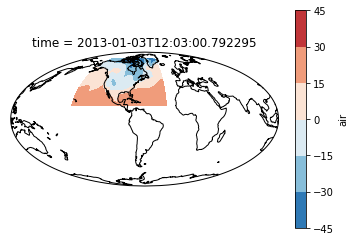

In [22]:
#Define axis
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-60))
air2d.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
ax.set_global(); ax.coastlines()
plt.show()

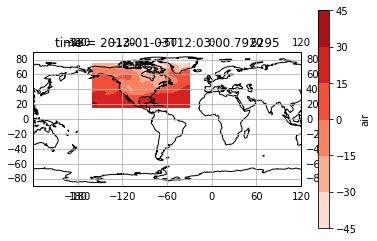

In [35]:
# https://matplotlib.org/examples/color/colormaps_reference.html
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-60))
air2d.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),cmap='Reds')
# Lble the gridlines
ax.gridlines(draw_labels=True)
ax.set_global(); ax.coastlines()
plt.show()

In [43]:
#Pandas - Time series handling
air['time.hour']


<xarray.DataArray 'air' (time: 2920)>
array([ 0.693245,  0.083509,       nan, ..., -0.105509,       nan,  0.264981])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-01T06:00:00 ...

In [45]:
#convert DataArray to pandas.Series
airtemps['air']


In [46]:
newAir = airtemps['air'].to_series()
newAir

time                           lat   lon  
2013-01-01 00:02:06.757437440  75.0  200.0    241.20
                                     202.5    242.50
                                     205.0    243.50
                                     207.5    244.00
                                     210.0    244.10
                                     212.5    243.89
                                     215.0    243.60
                                     217.5    243.10
                                     220.0    242.50
                                     222.5    241.89
                                     225.0    241.20
                                     227.5    240.30
                                     230.0    239.50
                                     232.5    238.80
                                     235.0    238.50
                                     237.5    238.70
                                     240.0    239.60
                                     242.5    241.00
   

In [47]:
air['time']

<xarray.DataArray 'time' (time: 2920)>
array(['2013-01-01T00:02:06.757437440', '2013-01-01T05:59:27.234179072',
       '2013-01-01T11:56:47.710920704', ..., '2014-12-31T05:58:10.831327232',
       '2014-12-31T11:55:31.308068864', '2014-12-31T18:02:01.540624384'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01T00:02:06.757437440 ...
Attributes:
    standard_name:  time
    long_name:      Time

In [51]:
janDat = air.sel(time=air['time.month'] == 1)
janDat

<xarray.DataArray 'air' (time: 248, lat: 25, lon: 53)>
array([[[-31.95, -30.65, ..., -37.65, -34.55],
        [-29.35, -28.65, ..., -37.85, -33.85],
        ..., 
        [ 22.75,  23.05, ...,  22.75,  22.05],
        [ 23.14,  23.64, ...,  23.64,  23.45]],

       [[-31.05, -30.45, ..., -39.55, -37.35],
        [-29.55, -29.05, ..., -40.65, -37.45],
        ..., 
        [ 23.05,  23.55, ...,  22.35,  21.95],
        [ 23.14,  24.05, ...,  23.25,  23.45]],

       ..., 
       [[-12.45, -12.95, ..., -28.65, -28.15],
        [ -7.86,  -7.65, ..., -25.05, -21.35],
        ..., 
        [ 23.55,  23.45, ...,  20.85,  20.14],
        [ 23.35,  24.05, ...,  21.95,  21.64]],

       [[-13.36, -13.75, ..., -26.76, -25.15],
        [ -9.36, -10.05, ..., -25.85, -22.05],
        ..., 
        [ 25.05,  25.55, ...,  20.45,  19.45],
        [ 24.64,  25.14, ...,  21.35,  21.05]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) flo

In [58]:
decDat =air.sel(time=air['time.month'] == 12)
decDat

<xarray.DataArray 'air' (time: 247, lat: 25, lon: 53)>
array([[[ -1.36,  -2.45, ..., -34.95, -34.26],
        [ -1.45,  -2.15, ..., -33.95, -32.65],
        ..., 
        [ 25.14,  25.35, ...,  25.05,  24.64],
        [ 25.05,  25.05, ...,  25.35,  25.45]],

       [[ -1.75,  -1.65, ..., -36.26, -35.45],
        [ -2.45,  -2.15, ..., -39.15, -36.76],
        ..., 
        [ 24.45,  25.05, ...,  24.85,  24.85],
        [ 24.64,  25.05, ...,  24.95,  25.14]],

       ..., 
       [[-27.36, -28.36, ..., -29.16, -28.36],
        [-23.26, -23.86, ..., -30.66, -28.86],
        ..., 
        [ 23.14,  24.04, ...,  21.94,  21.24],
        [ 24.64,  25.24, ...,  22.34,  22.04]],

       [[-28.06, -28.86, ..., -31.66, -31.36],
        [-23.26, -23.86, ..., -32.86, -31.46],
        ..., 
        [ 22.94,  23.74, ...,  22.54,  22.04],
        [ 24.54,  24.94, ...,  23.04,  22.54]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 62.5 60.0 57.5 55.0 52.5 ...
  * lon      (lon) flo

In [77]:
s1 = (janDat.isel(lat=12,lon=12)).to_series()
s2 = (decDat.isel(lat=12,lon=12)).to_series()
s1.shape

(248,)

In [79]:
c = s2.corr(s1[0:-1])
c

nan

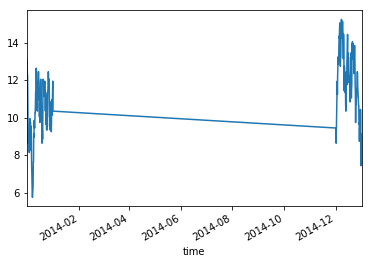

In [85]:
s2.plot()
plt.show()